In [8]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('2011.csv', skiprows=1, low_memory=False)
df = df.drop(columns=['id', 'member_id'])

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000,5000,4975.0,36,0.11,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60,0.15,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36,0.16,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36,0.13,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,3000,3000,3000.0,60,0.13,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# df["int_rate"] = df.int_rate.astype(float)

In [11]:
df_using = df[['int_rate', 'grade']]

df_using = df_using.dropna()

In [12]:
df_using = pd.get_dummies(df_using)
df_using.head()

,int_rate,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0.11,0,1,0,0,0,0,0
1,0.15,0,0,1,0,0,0,0
2,0.16,0,0,1,0,0,0,0
3,0.13,0,0,1,0,0,0,0
4,0.13,0,1,0,0,0,0,0


In [13]:
X = df_using[['grade_A','grade_B','grade_C','grade_D','grade_E', 'grade_F','grade_G',]]
y = df_using['int_rate'].values.reshape(-1,1)
print (X.shape, y.shape)

(39786, 7) (39786, 1)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
X_train_scaled[0]

array([-0.58365818,  1.51779378, -0.50430073, -0.39430385, -0.27592106,
       -0.16555252, -0.09247347])

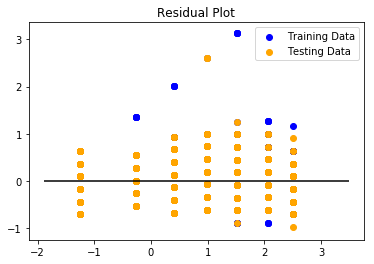

In [19]:
prediction = model.predict(X_test_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.08371644592486584, R2: 0.9156382461403643


In [22]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.08422304889631411, R2: 0.9151277381426856


In [23]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.08371676079970503, R2: 0.9156379288383888


In [24]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.08396926182852371, R2: 0.9153834814665829


In [38]:
#Predicting grade A's interest rate 

grade_a = model.predict(X_scaler.transform([[1,0,0,0,0,0,0]]))

In [39]:
#PREDICTED SCALED INTEREST RATE 
grade_a

array([[-1.24854278]])

In [41]:
#PREDICTED UNSCALED INTEREST RATE
grade_unscaled_a = y_scaler.inverse_transform(grade_a)

grade_unscaled_a

#actual predicted interest rate number for grade a

array([[0.07367065]])

In [42]:
grade_d = model.predict(X_scaler.transform([[0,0,0,1,0,0,0]]))

In [43]:
grade_d 

array([[0.99796415]])

In [46]:
grade_unscaled_d = y_scaler.inverse_transform(grade_d)

grade_unscaled_d

#actual predicted interest rate number for grade d 

array([[0.15731822]])

In [47]:
grade_g = model.predict(X_scaler.transform([[0,0,0,0,0,0,1]]))

In [49]:
grade_g

array([[2.51002511]])

In [50]:
grade_unscaled_g = y_scaler.inverse_transform(grade_g)

grade_unscaled_g

#actual predicted interest rate number for grade g

array([[0.21361907]])